# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import time
from scipy import stats

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

596

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL 
query_url = f'{url}appid={weather_api_key}&units={units}&q='


# set up lists to hold reponse info
name = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []


#Set variables for counters
record = 1
set = 1

#Print the beginning statement
print("Beginning Data Retrieval ")
print("-----------------------------")

# Make a request for each of the cities in the list
for city in cities:
    response = requests.get(query_url + city).json()
    
    #Pull data for each category, using try and except for cities that aren't found
    try:
        name.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        
        #If data is stored, print record name of sets of 50 and city name
        print(f'Processing Record {record} of Set {set} | {city}')
        
        #Add one to the counter of the records
        record = record + 1
        
        #If the record number goes over 50, start a new set
        if record > 50:
              record = 1
              set = set + 1
            
    #If there is a key error with the city name, print that this city is skipped
    except(KeyError):
        print(f'City not found. Skipping...')
        
#Print the ending statements
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")        

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | alofi
Processing Record 3 of Set 1 | tuktoyaktuk
Processing Record 4 of Set 1 | buala
Processing Record 5 of Set 1 | yellowknife
City not found. Skipping...
Processing Record 6 of Set 1 | provideniya
Processing Record 7 of Set 1 | konstantinovka
Processing Record 8 of Set 1 | port alfred
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | airai
Processing Record 11 of Set 1 | vaini
Processing Record 12 of Set 1 | chupa
Processing Record 13 of Set 1 | kununurra
Processing Record 14 of Set 1 | moose factory
City not found. Skipping...
Processing Record 15 of Set 1 | kodiak
Processing Record 16 of Set 1 | bobo dioulasso
Processing Record 17 of Set 1 | new norfolk
Processing Record 18 of Set 1 | ler
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | port elizabeth
Processing Record 21 of Set 1 | zhoucheng
Processing Record 22 o

City not found. Skipping...
Processing Record 38 of Set 4 | damaturu
Processing Record 39 of Set 4 | pemangkat
Processing Record 40 of Set 4 | korla
Processing Record 41 of Set 4 | gushikawa
Processing Record 42 of Set 4 | byron bay
Processing Record 43 of Set 4 | bonavista
Processing Record 44 of Set 4 | kajansi
Processing Record 45 of Set 4 | valdivia
Processing Record 46 of Set 4 | georgetown
Processing Record 47 of Set 4 | cape town
Processing Record 48 of Set 4 | suda
Processing Record 49 of Set 4 | lompoc
Processing Record 50 of Set 4 | la massana
Processing Record 1 of Set 5 | coahuayana
Processing Record 2 of Set 5 | zhigansk
Processing Record 3 of Set 5 | salalah
Processing Record 4 of Set 5 | cherskiy
Processing Record 5 of Set 5 | port hardy
Processing Record 6 of Set 5 | huejuquilla el alto
Processing Record 7 of Set 5 | bose
Processing Record 8 of Set 5 | buraydah
Processing Record 9 of Set 5 | prince rupert
Processing Record 10 of Set 5 | kavaratti
Processing Record 11 of

Processing Record 27 of Set 8 | galveston
Processing Record 28 of Set 8 | esperance
Processing Record 29 of Set 8 | caravelas
Processing Record 30 of Set 8 | pemberton
Processing Record 31 of Set 8 | nhulunbuy
Processing Record 32 of Set 8 | nargana
Processing Record 33 of Set 8 | chicama
Processing Record 34 of Set 8 | treinta y tres
Processing Record 35 of Set 8 | springbok
Processing Record 36 of Set 8 | chumikan
Processing Record 37 of Set 8 | belaya gora
Processing Record 38 of Set 8 | sur
Processing Record 39 of Set 8 | blagoveshchenka
Processing Record 40 of Set 8 | krabi
Processing Record 41 of Set 8 | anchovy
Processing Record 42 of Set 8 | hambantota
Processing Record 43 of Set 8 | elko
Processing Record 44 of Set 8 | lagoa
Processing Record 45 of Set 8 | vaitape
Processing Record 46 of Set 8 | san buenaventura
Processing Record 47 of Set 8 | beya
Processing Record 48 of Set 8 | olkhovatka
Processing Record 49 of Set 8 | san policarpo
Processing Record 50 of Set 8 | poronaysk

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#Put collected data into a dataframe
city_df = pd.DataFrame({"City": name, "Latitude": lat, "Longitude": lng, "Max Temp": max_temp, "Humidity": humidity,
                       "Cloudiness": cloudiness, "Wind Speed": wind_speed, "Country": country, "Date": date})

#Export data to csv
city_df.to_csv("output_files/city.csv")

city_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.6001,-73.9662,23.0,50,99,1.01,US,1612199914
1,Alofi,-19.0595,-169.9187,75.2,100,90,4.61,NU,1612200185
2,Tuktoyaktuk,69.4541,-133.0374,-20.2,76,90,5.75,CA,1612200185
3,Buala,-8.1450,159.5921,81.1,78,100,13.87,SB,1612200185
4,Yellowknife,62.4560,-114.3525,-4.0,77,75,8.05,CA,1612199896


In [6]:
too_humid = city_df["Humidity"].loc[city_df["Humidity"]>100]
print(too_humid)

Series([], Name: Humidity, dtype: int64)


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [15]:
too_humid = city_df["Humidity"].loc[city_df["Humidity"]>100]
# print(too_humid["index"])
print(too_humid)

Series([], Name: Humidity, dtype: int64)


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

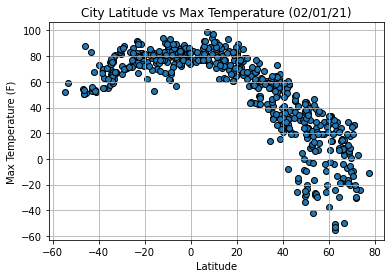

In [7]:
date_time = time.gmtime(city_df['Date'][0])
date_convert = time.strftime("%x", date_time)

# Build a scatter plot for each data type
plt.scatter(city_df["Latitude"], city_df["Max Temp"], marker="o", edgecolor = "black")

# Incorporate the other graph properties
plt.title(f'City Latitude vs Max Temperature ({date_convert})')
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_files/fig1.png")

# Show plot
plt.show()



## Latitude vs. Humidity Plot

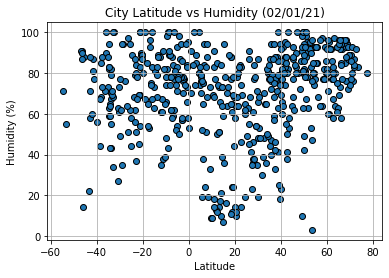

In [8]:
date_time = time.gmtime(city_df['Date'][0])
date_convert = time.strftime("%x", date_time)

# Build a scatter plot for each data type
plt.scatter(city_df["Latitude"], city_df["Humidity"], marker="o", edgecolor = "black")

# Incorporate the other graph properties
plt.title(f'City Latitude vs Humidity ({date_convert})')
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_files/fig2.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

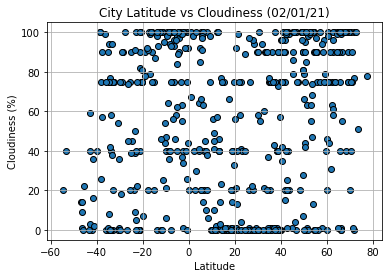

In [9]:
date_time = time.gmtime(city_df['Date'][0])
date_convert = time.strftime("%x", date_time)

# Build a scatter plot for each data type
plt.scatter(city_df["Latitude"], city_df["Cloudiness"], marker="o", edgecolor = "black")

# Incorporate the other graph properties
plt.title(f'City Latitude vs Cloudiness ({date_convert})')
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_files/fig3.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

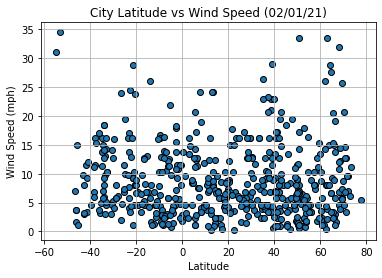

In [10]:
date_time = time.gmtime(city_df['Date'][0])
date_convert = time.strftime("%x", date_time)

# Build a scatter plot for each data type
plt.scatter(city_df["Latitude"], city_df["Wind Speed"], marker="o", edgecolor = "black")

# Incorporate the other graph properties
plt.title(f'City Latitude vs Wind Speed ({date_convert})')
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_files/fig4.png")

# Show plot
plt.show()

## Linear Regression

In [11]:
#Create separate dfs for Northern & Southern Hemispheres
northern_lat_df = city_df.loc[city_df["Latitude"] >= 0]
southern_lat_df = city_df.loc[city_df["Latitude"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7339104950067887


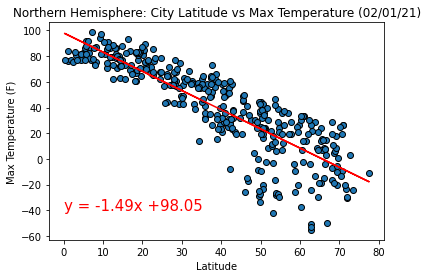

In [13]:
#Perform linear regression on temp vs latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern_lat_df["Latitude"], northern_lat_df["Max Temp"])

# Get regression values
regress_values = northern_lat_df["Latitude"] * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))


#Convert the date
date_time = time.gmtime(city_df['Date'][0])
date_convert = time.strftime("%x", date_time)

# Build a scatter plot for each data type
plt.scatter(northern_lat_df["Latitude"], northern_lat_df["Max Temp"], marker="o", edgecolor = "black")
plt.plot(northern_lat_df["Latitude"],regress_values,"r-")

# Incorporate the other graph properties
plt.title(f'Northern Hemisphere: City Latitude vs Max Temperature ({date_convert})')
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")


#Annotate the line equation
plt.annotate(line_eq,(0,-40),fontsize=15,color="red")

# Print r value - should this be r2 or just r???
print(f"The r-value is: {rvalue**2}")

# Save the figure
plt.savefig("output_files/fig5.png")

# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


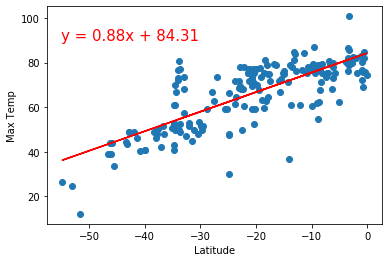

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


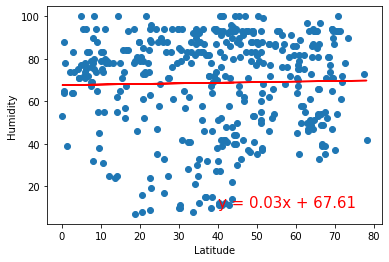

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


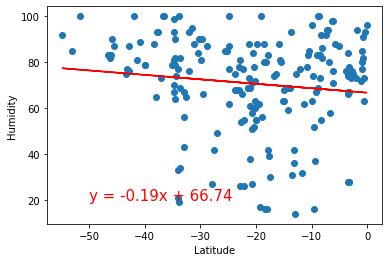

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


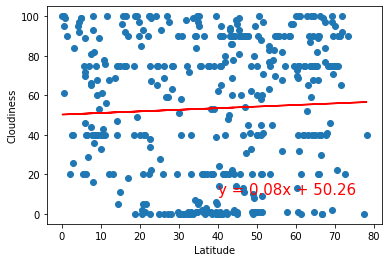

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


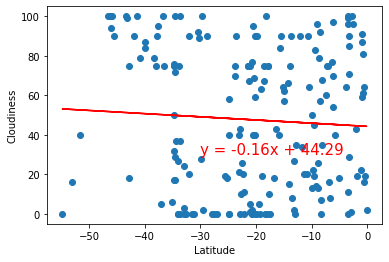

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


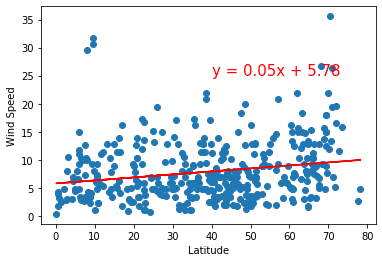

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


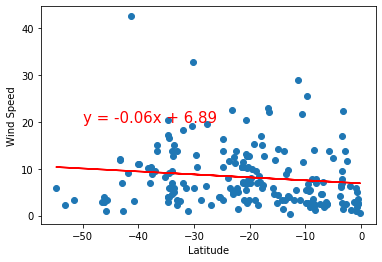